**EVALUATING THE EFFECTIVENESS OF SQUEEZENET ARCHITECTURE FOR EARLY DETECTION OF EYE DISEASES ON RESOURCE LIMITED DEVICES: A COMPARATIVE ANALYSIS**


REPORT BY ANICHEBE OSITA

# Package installations

https://www.kaggle.com/code/abdallahwagih/eye-diseases-classification-acc-93-8

https://arxiv.org/search/

In [34]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [35]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [36]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [37]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [38]:
exit

In [36]:
import numpy as np
import tensorflow as tf
import os
import shutil
import cv2 
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score

from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, precision_recall_fscore_support
import seaborn as sns
from tensorflow.keras import regularizers
import time
import pandas as pd

# Data Preprocessing

In [ ]:
#Here i rename all images in the eye desease folders to better describe their information.
folder_path = "C:/Users/732093/3D Objects/dataset/cataract"
n=0
for filename in os.listdir(folder_path):
    # construct the new filename with a prefix
    new_filename = "cataract" + str(n) + ".jpg"
    n+=1
    # rename the file
    os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))

In [ ]:
folders = ['C:/Users/732093/3D Objects/dataset/cataract', 'C:/Users/732093/3D Objects/dataset/diabetic_retinopathy', 'C:/Users/732093/3D Objects/dataset/glaucoma','C:/Users/732093/3D Objects/dataset/normal']
destination = 'C:/Users/732093/3D Objects/dataset/iris'
# Loop through the folders and copy their contents to the destination folder
for folder in folders:
    for item in os.listdir(folder):
        s = os.path.join(folder, item)
        d = os.path.join(destination, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, False, None)
        else:
            shutil.copy2(s, d)

In [9]:
image = cv2.imread(r'C:/Users/732093/3D Objects/dataset/cataract/cataract101.jpg')

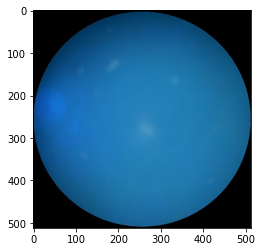

In [10]:
plt.imshow(image)

Resizing the data as part of my input nominalization

In [ ]:
from PIL import Image

# Define the target dimensions
target_width = 512
target_height = 512

# Define the input and output folders
input_folder = "C:/Users/732093/3D Objects/dataset/Iris"
output_folder = "C:/Users/732093/3D Objects/dataset/Iris_resized"

# Loop through all files in the input folder
for filename in os.listdir(input_folder):
    # Open the image and resize it
    image_path = os.path.join(input_folder, filename)
    image = Image.open(image_path)
    resized_image = image.resize((target_width, target_height))
        
    # Save the resized image to the output folder
    output_path = os.path.join(output_folder, filename)
    resized_image.save(output_path)

**Renaming the datasets to conform for processing**

In [10]:
import os

# specify the directory path
directory_path = "C:/Users/732093/3D Objects/dataset/Iris_resized"

# define a dictionary to map the original class names to the new class names
class_map = {
    "glaucoma": "glaucoma_",
    "diabetic": "diabetic_",
    "cataract": "cataract_",
    "normal": "normal_"
}

# loop through the files in the directory
for filename in os.listdir(directory_path):
    # check if the file is an image file
    # loop through the class names in the class map
    for key, value in class_map.items():
         # check if the file name contains the class name
        if key in filename:
             # create the new file name by replacing the class name with the new class name
            new_filename = filename.replace(key, value)
            # rename the file
            os.rename(os.path.join(directory_path, filename), os.path.join(directory_path, new_filename))
            break


**<font color="red">Data Augumentation: Data was transposed on all axis to increase Data count for modelling</font>**

In [ ]:
# Define the initial index values for each category
cataract_index = 1037
diabetic_index = 1097
glaucoma_index = 1007
normal_index = 1074

In [ ]:
# Loop through all the files in the folder
for filename in os.listdir(folder_path):
    # Open the image using Pillow
    image = Image.open(os.path.join(folder_path, filename))

    # Check the category of the image based on the file name prefix
    if filename.startswith('cataract'):
        # Set the new file name based on the category and index values
        new_filename = f'cataract_{cataract_index}.jpg'

        # Increment the index for this category
        cataract_index += 1
    elif filename.startswith('diabetic'):
        # Set the new file name based on the category and index values
        new_filename = f'diabetic_{diabetic_index}.jpg'

        # Increment the index for this category
        diabetic_index += 1
    elif filename.startswith('glaucoma'):
        # Set the new file name based on the category and index values
        new_filename = f'glaucoma_{glaucoma_index}.jpg'

        # Increment the index for this category
        glaucoma_index += 1
    elif filename.startswith('normal'):
        # Set the new file name based on the category and index values
        new_filename = f'normal_{normal_index}.jpg'

        # Increment the index for this category
        normal_index += 1


    # Flip the image horizontally and vertically
    flipped_image = image.transpose(method=Image.FLIP_LEFT_RIGHT).transpose(method=Image.FLIP_TOP_BOTTOM)

    # Save the flipped and duplicated images in the output folder with the new names
    flipped_image.save(os.path.join(output_folder_path, f'flipped_{new_filename}'))

# Data Loading and Label encoding process

**<font color="red">Normalizing the data for improved model performance</font>**

**Load the Data**

Code below used to find the image file format

In [6]:
folder_path = 'C:/Users/732093/3D Objects/dataset/Iris_resized'

# Loop over all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is not a JPG image
    if not filename.endswith('.jpg'):
        # Delete the file
        os.remove(os.path.join(folder_path, filename))

In [2]:
#for file in os.listdir("C:/Users/732093/3D Objects/dataset/Iris_resized"):
 #   img_path = os.path.join("C:/Users/732093/3D Objects/dataset/Iris_resized", file)

data = []
labels = []

for file in os.listdir("C:/Users/732093/3D Objects/dataset/Iris_resized"):
    img_path = os.path.join("C:/Users/732093/3D Objects/dataset/Iris_resized", file)
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))  # Load the image
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Convert the image to a NumPy array
    data.append(img_array)  # Add the NumPy array to the data list
    label = file.split("_")[0]  # Extract the class label from the name prefix
    labels.append(label)  # Add the label to the labels list

In [3]:
type(data[7])

numpy.ndarray

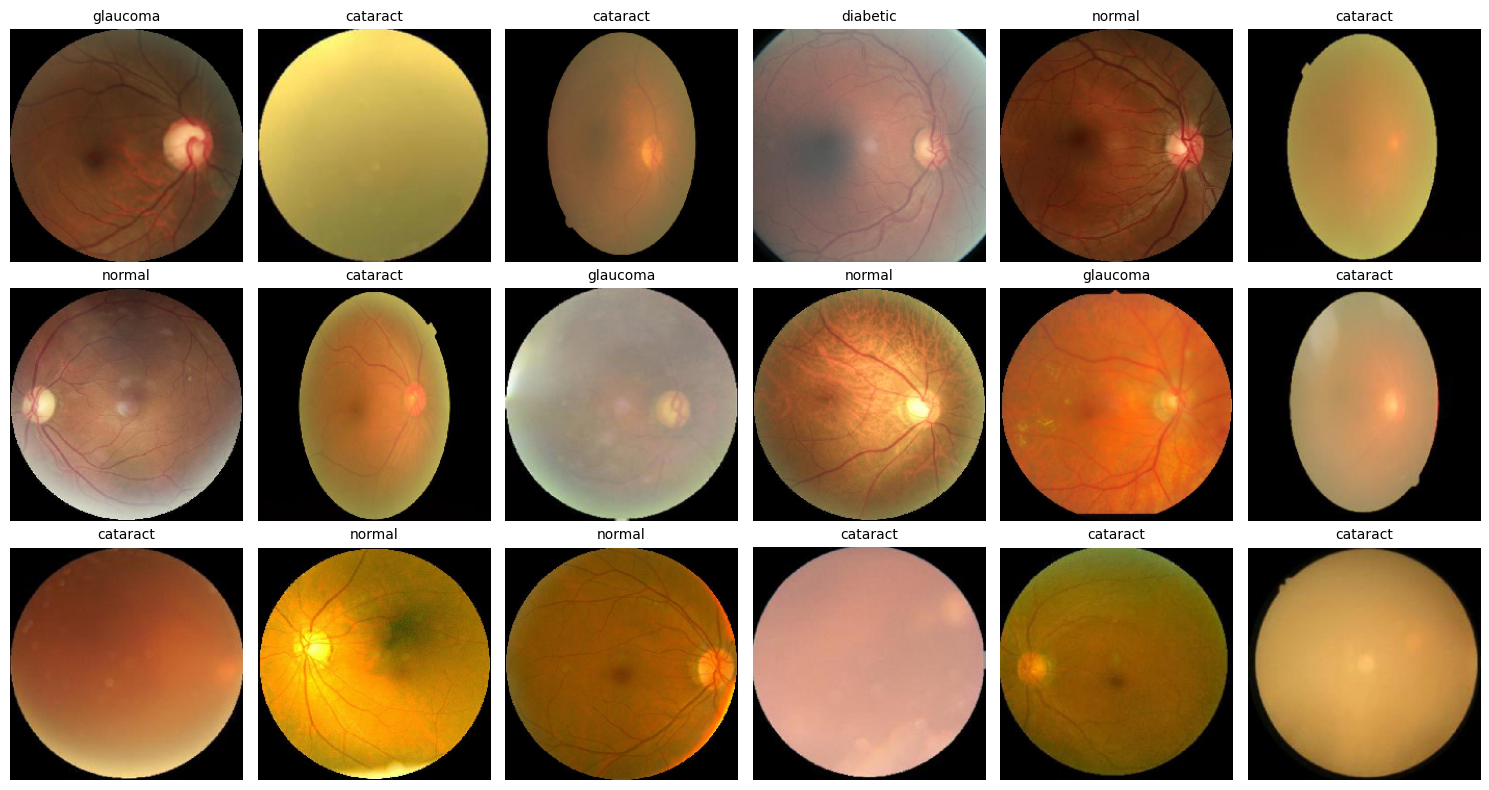

In [5]:
#display random images from data set along with corresponding label on a 3*6 grid

import random

fig, axs = plt.subplots(3, 6, figsize=(15, 8))
axs = axs.ravel()  # Flatten the axs array

# Get 18 random images and labels
indices = random.sample(range(len(data)), 18)
images = [data[i] for i in indices]
labels = [labels[i] for i in indices]

for i, (img, label) in enumerate(zip(images, labels)):
    # Display the image on the subplot
    axs[i].imshow(img.astype('uint8'))

    # Set the title of the subplot to the label
    axs[i].set_title(label, fontsize=10)
    
    # Set the label below the image
    axs[i].set_xlabel(label, fontsize=8)

    # Hide the axis labels
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [4]:

Labels=(list(set(labels)))

In [5]:
Labels

['cataract', 'glaucoma', 'diabetic', 'normal']

In [6]:
len(labels)

8432

 ~ encode categorical labels into numerical labels

In [7]:
label_encoder = LabelEncoder()

In [8]:
label_encoder.fit(labels)

LabelEncoder()

In [9]:
labels = label_encoder.transform(labels)

In [10]:
# # Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [11]:
labels

array([0, 0, 0, ..., 3, 3, 3])

# Model Utilizing VGG-11 CNN architecture

**<font color="red">Model Utilizing VGG-11 CNN ARCHITECTURE</font>**

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [22]:
VGG_Model=Sequential([
    # Block 1
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(224,224,3)),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
    # Block 2
    Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
    # Block 3
    Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
    # Block 4
    Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
    # Block 5
    Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
    # Dense Layers
    Flatten(),
    Dense(units=4096, activation='relu'),
    Dense(units=4096, activation='relu'),
    Dense(units=4, activation='softmax')
])

In [23]:
VGG_Model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = VGG_Model.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
169/169 [==============================] - 32s 135ms/step - loss: 59.1328 - accuracy: 0.3760 - val_loss: 0.8666 - val_accuracy: 0.5849
Epoch 2/15
169/169 [==============================] - 21s 125ms/step - loss: 0.7333 - accuracy: 0.6648 - val_loss: 0.7076 - val_accuracy: 0.6827
Epoch 3/15
169/169 [==============================] - 21s 125ms/step - loss: 0.6546 - accuracy: 0.7081 - val_loss: 0.6305 - val_accuracy: 0.7116
Epoch 4/15
169/169 [==============================] - 21s 125ms/step - loss: 0.6171 - accuracy: 0.7287 - val_loss: 0.6614 - val_accuracy: 0.7087
Epoch 5/15
169/169 [==============================] - 21s 126ms/step - loss: 0.6199 - accuracy: 0.7411 - val_loss: 0.6111 - val_accuracy: 0.7457
Epoch 6/15
169/169 [==============================] - 21s 126ms/step - loss: 0.5598 - accuracy: 0.7591 - val_loss: 0.4553 - val_accuracy: 0.8273
Epoch 7/15
169/169 [==============================] - 21s 126ms/step - loss: 0.4667 - accuracy: 0.8080 - val_loss: 0.4880 - val_a

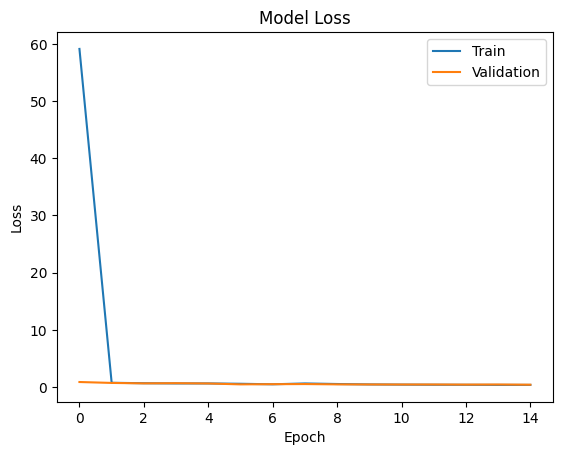

In [26]:
# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

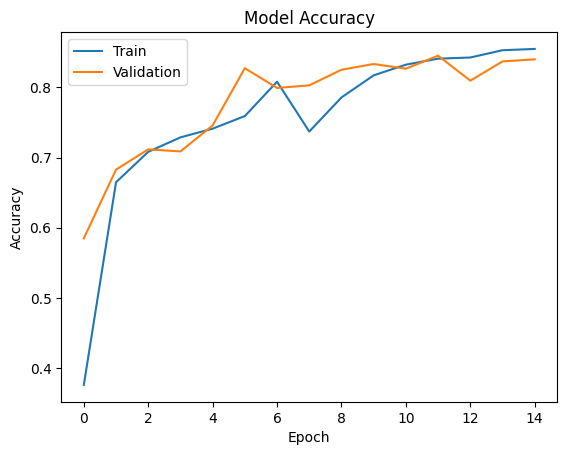

In [27]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
y_pred = VGG_Model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

53/53 [==============================] - 3s 55ms/step


Text(0.5, 1.0, 'Confusion Matrix')

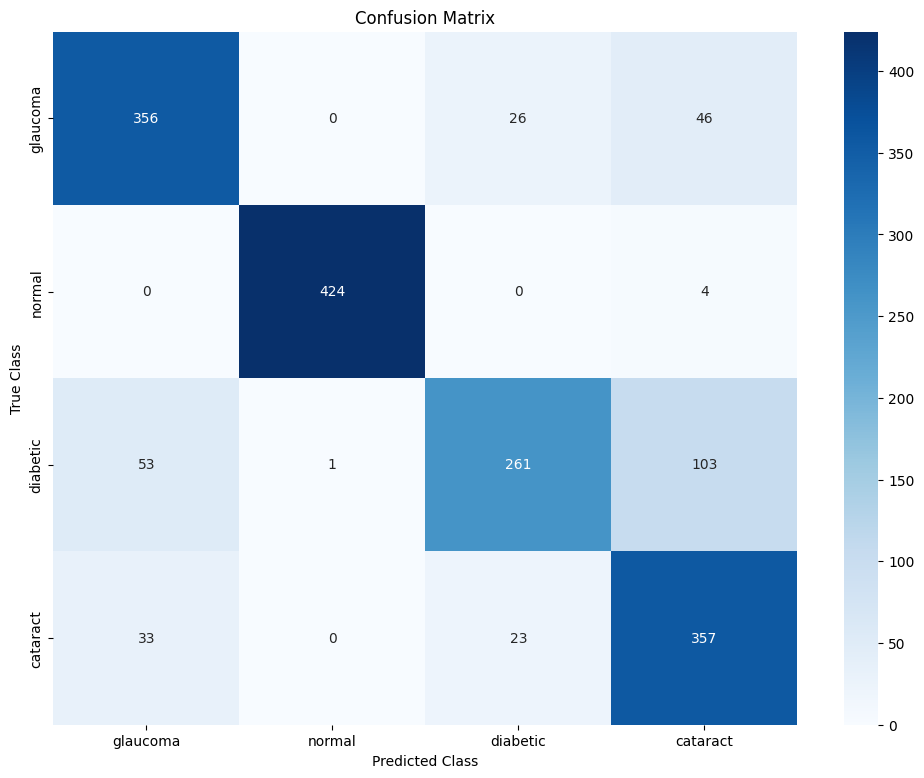

In [30]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=Labels, yticklabels=Labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

In [31]:
loss, accuracy = VGG_Model.evaluate(test_images, test_labels)

53/53 [==============================] - 2s 41ms/step - loss: 0.4302 - accuracy: 0.8287


In [32]:
print('Accuracy:', accuracy, 'Loss:', loss)

Accuracy: 0.8286899924278259 Loss: 0.4301982522010803


In [42]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_true=test_labels
report = classification_report(y_true, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       428
           1       1.00      0.99      0.99       428
           2       0.84      0.62      0.72       418
           3       0.70      0.86      0.77       413

    accuracy                           0.83      1687
   macro avg       0.84      0.83      0.83      1687
weighted avg       0.84      0.83      0.83      1687



In [43]:
# Calculate precision for each class
y_true_classes = test_labels
precision_per_class = precision_score(y_true_classes, y_pred_classes, average=None)

# Calculate average precision across all classes
avg_precision = precision_score(y_true_classes, y_pred_classes, average='weighted')

# Print precision scores
print('Precision per class:', precision_per_class)
print('Average precision:', avg_precision)

Precision per class: [0.80542986 0.99764706 0.84193548 0.7       ]
Average precision: 0.8374309160254816


In [44]:
# Calculate recall for each class
recall_per_class = recall_score(y_true_classes, y_pred_classes, average=None)
# Calculate recall for each class
recall_per_class = recall_score(y_true_classes, y_pred_classes, average=None)
# Calculate average recall across all classes
avg_recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
# Print recall scores
print('Recall per class:', recall_per_class)
print('Average recall:', avg_recall)

Recall per class: [0.8317757  0.99065421 0.62440191 0.86440678]
Average recall: 0.8286899822169532


In [46]:
# Count the number of parameters in the model
num_params = VGG_Model.count_params()

print("Total number of parameters in the model: ", num_params)

Total number of parameters in the model:  134276932


In [47]:
def get_model_size(model):
    variables = model.variables
    size = sum([np.product(list(variable.shape)) * variable.dtype.size for variable in variables])
    return size


model_size = get_model_size(VGG_Model)
print(f"Model size: {model_size} bytes")

Model size: 537107728 bytes


In [50]:
start_time = time.time()
predictions = VGG_Model.predict(test_images)
end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time

print("Inference time:", inference_time, "seconds")

53/53 [==============================] - 2s 43ms/step
Inference time: 3.22245192527771 seconds


In [51]:
#Save model to drive
VGG_Model.save("VGG11.h5")

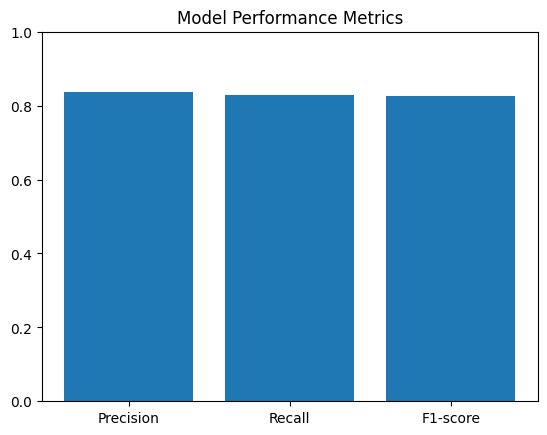

In [57]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_true=test_labels
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred_labels, average='macro')

# Plot the metrics as a bar chart
fig, ax = plt.subplots()
ax.bar(['Precision', 'Recall', 'F1-score'], [precision, recall, f1_score])
ax.set_ylim([0, 1])
ax.set_title('Model Performance Metrics')
plt.show()

In [79]:
VGG_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

# Custom Convolutional Neural Network

**<font color="red">MODEL1 Custom Convolutional Neural Network</font>**

In [60]:
# Split the data into train, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [62]:
# Define the CNN model
CNNmodel = Sequential()

In [64]:
# Add convolutional layers
CNNmodel.add(layers.Conv2D(32, (3, 3), activation='relu'))#, input_shape=(image_height, image_width, image_channels)))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add fully connected layers
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dropout(0.5))
CNNmodel.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
#model.add(layers.Dense(64, activation='relu'))
CNNmodel.add(layers.Dense(4, activation='softmax'))

In [65]:
# Compile the model
CNNmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
# Train the model
history1= CNNmodel.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
169/169 [==============================] - 4s 21ms/step - loss: 22.4939 - accuracy: 0.5951 - val_loss: 0.9846 - val_accuracy: 0.7094
Epoch 2/15
169/169 [==============================] - 3s 19ms/step - loss: 0.9306 - accuracy: 0.7252 - val_loss: 0.9017 - val_accuracy: 0.7391
Epoch 3/15
169/169 [==============================] - 3s 18ms/step - loss: 0.8664 - accuracy: 0.7450 - val_loss: 0.9412 - val_accuracy: 0.7161
Epoch 4/15
169/169 [==============================] - 3s 19ms/step - loss: 0.8354 - accuracy: 0.7454 - val_loss: 0.8692 - val_accuracy: 0.7265
Epoch 5/15
169/169 [==============================] - 3s 19ms/step - loss: 0.8026 - accuracy: 0.7559 - val_loss: 0.8577 - val_accuracy: 0.7331
Epoch 6/15
169/169 [==============================] - 3s 18ms/step - loss: 0.7833 - accuracy: 0.7513 - val_loss: 0.8695 - val_accuracy: 0.7287
Epoch 7/15
169/169 [==============================] - 3s 19ms/step - loss: 0.7782 - accuracy: 0.7561 - val_loss: 0.8675 - val_accuracy: 0.735

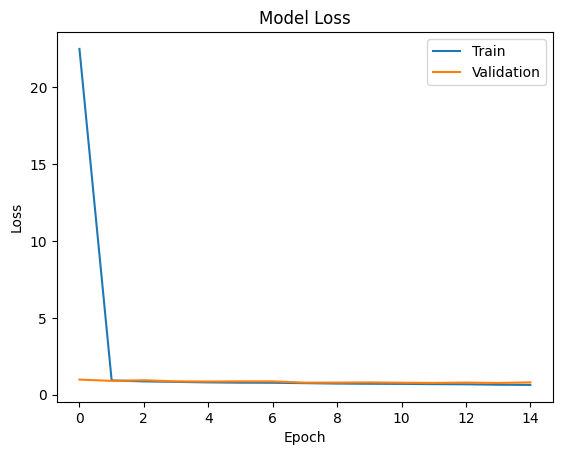

In [67]:
# plot training and validation loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

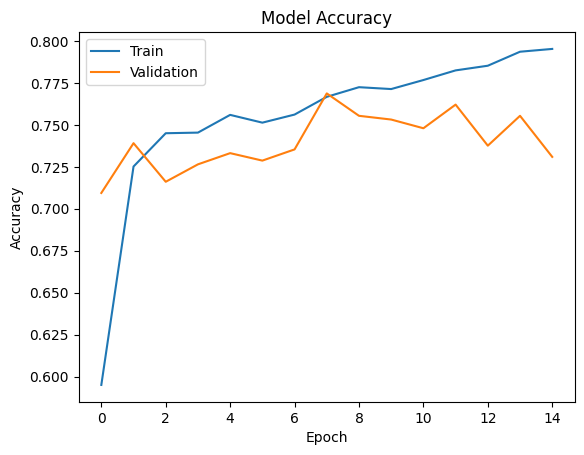

In [68]:
# plot training and validation accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [69]:
y_pred = CNNmodel.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

53/53 [==============================] - 1s 12ms/step


Text(0.5, 1.0, 'Confusion Matrix')

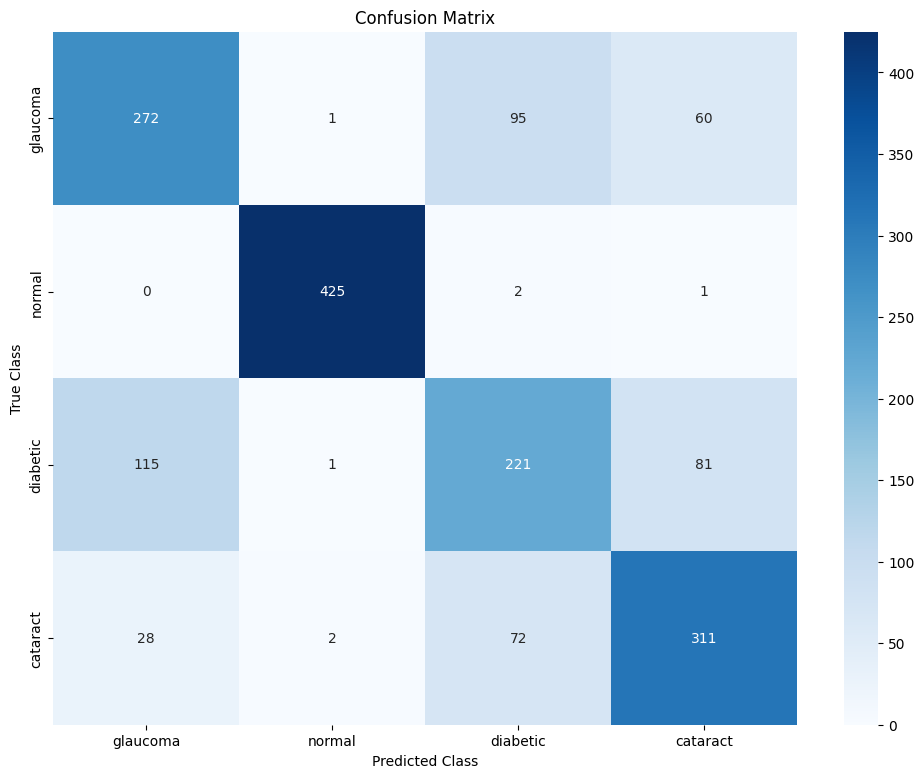

In [70]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=Labels, yticklabels=Labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

In [72]:
loss, accuracy = CNNmodel.evaluate(test_images, test_labels)

53/53 [==============================] - 0s 9ms/step - loss: 0.7895 - accuracy: 0.7285


In [73]:
print('Accuracy:', accuracy, 'Loss:', loss)

Accuracy: 0.728512167930603 Loss: 0.7895206212997437


In [74]:
# Calculate precision for each class
y_true_classes = test_labels
precision_per_class = precision_score(y_true_classes, y_pred_classes, average=None)

# Calculate average precision across all classes
avg_precision = precision_score(y_true_classes, y_pred_classes, average='weighted')

# Print precision scores
print('Precision per class:', precision_per_class)
print('Average precision:', avg_precision)

Precision per class: [0.65542169 0.99067599 0.56666667 0.68653422]
Average precision: 0.7261026105218019


In [75]:
# Calculate recall for each class
recall_per_class = recall_score(y_true_classes, y_pred_classes, average=None)
# Calculate recall for each class
recall_per_class = recall_score(y_true_classes, y_pred_classes, average=None)
# Calculate average recall across all classes
avg_recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
# Print recall scores
print('Recall per class:', recall_per_class)
print('Average recall:', avg_recall)

Recall per class: [0.63551402 0.99299065 0.52870813 0.75302663]
Average recall: 0.7285121517486662


In [76]:
# Count the number of parameters in the model
num_params = CNNmodel.count_params()

print("Total number of parameters in the model: ", num_params)

Total number of parameters in the model:  11132228


In [77]:
def get_model_size(model):
    variables = model.variables
    size = sum([np.product(list(variable.shape)) * variable.dtype.size for variable in variables])
    return size


model_size = get_model_size(CNNmodel)
print(f"Model size: {model_size} bytes")

Model size: 44528912 bytes


In [78]:
from sklearn.metrics import classification_report

y_pred = CNNmodel.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_labels

report = classification_report(y_true_classes, y_pred_classes)
print(report)

53/53 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       428
           1       0.99      0.99      0.99       428
           2       0.57      0.53      0.55       418
           3       0.69      0.75      0.72       413

    accuracy                           0.73      1687
   macro avg       0.72      0.73      0.73      1687
weighted avg       0.73      0.73      0.73      1687



In [83]:
CNNmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 173056)           

In [84]:
#Save model to drive
CNNmodel.save("Cnn.h5")

In [ ]:
#Load saved model from drive for further accuracy checks
model = load_model('C:/Users/732093/3D Objects/Cnn.h5')

In [87]:
start_time = time.time()
predictions = CNNmodel.predict(test_images)
end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time

print("Inference time:", inference_time, "seconds")

53/53 [==============================] - 1s 12ms/step
Inference time: 1.722214937210083 seconds


# Model Utilizing SqueezeNet CNN architecture

In [74]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from sklearn.metrics import precision_score
import random
from sklearn.metrics import recall_score

**<font color="red">MODEL2 UTILIZING SQUEEZENET CNN ARCHITECTURE</font>**

In [12]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.1, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.20, random_state=42)

In [80]:
len(test_data)

844

In [51]:
model2 = Sequential()

In [54]:
# Add the first Convolutional layer
model2.add(Conv2D(96, (7, 7), strides=(2, 2), padding='same'))
model2.add(Activation('relu'))

In [55]:
# Add the MaxPooling layer
model2.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

In [56]:
# Add the Fire modules
fire_id = 2
filters = [16, 64, 128, 256]
for i in range(4):
    model2.add(Conv2D(filters[i], (1, 1), padding='same', name='fire{}/squeeze'.format(fire_id)))
    model2.add(Activation('relu'))
    model2.add(Conv2D(filters[i], (3, 3), padding='same', name='fire{}/expand1'.format(fire_id)))
    model2.add(Activation('relu'))
    model2.add(Conv2D(filters[i], (3, 3), padding='same', name='fire{}/expand2'.format(fire_id)))
    model2.add(Activation('relu'))
    fire_id += 1

In [57]:
# Add the second Convolutional layer
model2.add(Conv2D(64, (1, 1), padding='same'))
model2.add(Activation('relu'))

In [58]:
# Add the Dropout layer
model2.add(Dropout(0.5))

In [59]:
# Add the third Convolutional layer
model2.add(Conv2D(4, (1, 1), padding='same'))
model2.add(Activation('relu'))

In [60]:
# Add the Flatten layer
model2.add(Flatten())

In [61]:
# Add the Dense layer
model2.add(Dense(4, activation='softmax'))

In [62]:
# Compile the model
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
# Train the model
history3=model2.fit(train_data, train_labels, epochs=15, batch_size=32, validation_data=(val_data, val_labels))

Epoch 1/15
190/190 [==============================] - 17s 44ms/step - loss: 1.2148 - accuracy: 0.3939 - val_loss: 0.9215 - val_accuracy: 0.5639
Epoch 2/15
190/190 [==============================] - 7s 39ms/step - loss: 0.7832 - accuracy: 0.6703 - val_loss: 0.9119 - val_accuracy: 0.6528
Epoch 3/15
190/190 [==============================] - 7s 39ms/step - loss: 0.6420 - accuracy: 0.7272 - val_loss: 0.5564 - val_accuracy: 0.7813
Epoch 4/15
190/190 [==============================] - 7s 39ms/step - loss: 0.5231 - accuracy: 0.7822 - val_loss: 0.5359 - val_accuracy: 0.7905
Epoch 5/15
190/190 [==============================] - 7s 39ms/step - loss: 0.4660 - accuracy: 0.8115 - val_loss: 0.4389 - val_accuracy: 0.8386
Epoch 6/15
190/190 [==============================] - 7s 39ms/step - loss: 0.4182 - accuracy: 0.8300 - val_loss: 0.4325 - val_accuracy: 0.8333
Epoch 7/15
190/190 [==============================] - 7s 39ms/step - loss: 0.3917 - accuracy: 0.8435 - val_loss: 0.4200 - val_accuracy: 0.833

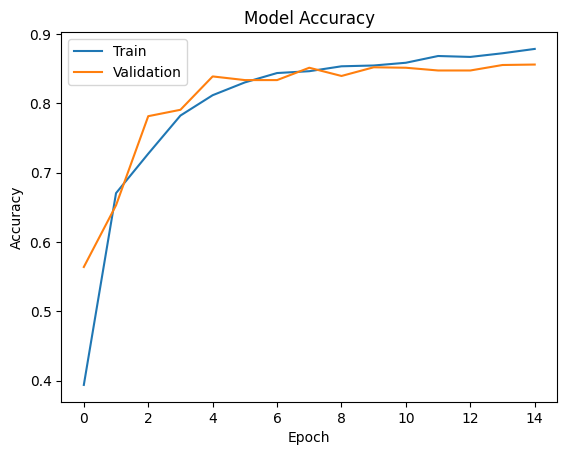

In [64]:
# plot training and validation accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

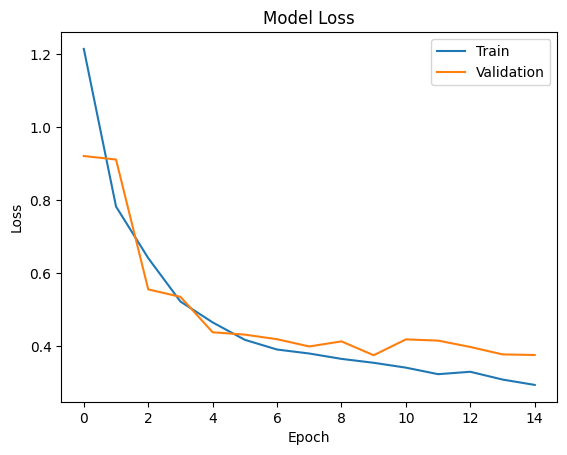

In [65]:
# plot training and validation loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [311]:
from sklearn.metrics import classification_report

y_pred = Squeeze.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_labels

report = classification_report(y_true_classes, y_pred_classes)
print(report)

27/27 [==============================] - 1s 26ms/step
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       215
           1       1.00      0.98      0.99       215
           2       0.73      0.78      0.75       200
           3       0.79      0.79      0.79       214

    accuracy                           0.85       844
   macro avg       0.85      0.85      0.85       844
weighted avg       0.85      0.85      0.85       844



In [66]:
y_pred = model2.predict(test_images)

53/53 [==============================] - 1s 24ms/step


In [70]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
#Save model to drive
model2.save("Squeezenet.h5")

In [13]:
#Load saved model from drive for further accuracy checks
model = load_model('C:/Users/732093/3D Objects/Squeezenet.h5')

In [14]:
start_time = time.time()
predictions = model.predict(test_data)
end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time

print("Inference time:", inference_time, "seconds")

27/27 [==============================] - 26s 937ms/step
Inference time: 26.049689054489136 seconds


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 96)      14208     
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 96)        451680    
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 fire2/squeeze (Conv2D)      (None, 27, 27, 16)        1552      
                                                                 
 activation_1 (Activation)   (None, 27, 27, 16)        0         
                                                        

In [46]:
pred_labels = model.predict(test_data)
pred_labels = np.argmax(pred_labels, axis=1)

27/27 [==============================] - 16s 569ms/step


In [47]:
# Compute the confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

Text(0.5, 1.0, 'Confusion Matrix')

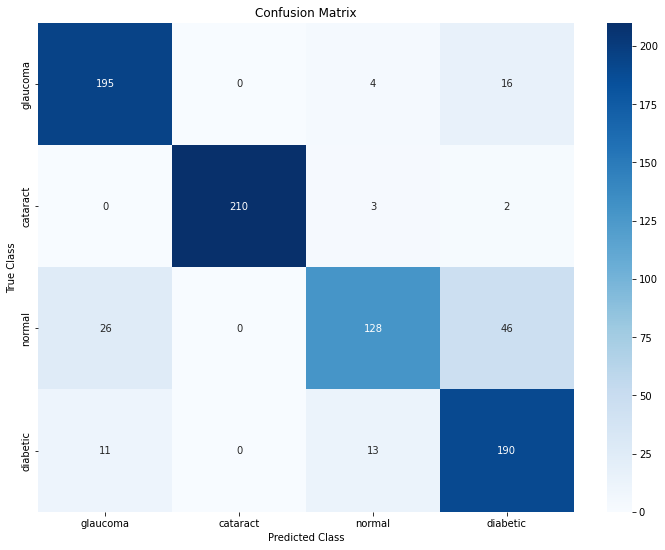

In [119]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=Labels, yticklabels=Labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

In [54]:
loss, accuracy = model.evaluate(test_data, test_labels)

27/27 [==============================] - 15s 531ms/step - loss: 0.3579 - accuracy: 0.8566


In [55]:
print('Accuracy:', accuracy)

Accuracy: 0.8566350936889648


In [49]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_labels
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes) 
print(confusion_mtx)

27/27 [==============================] - 15s 556ms/step
[[195   0   4  16]
 [  0 210   3   2]
 [ 26   0 128  46]
 [ 11   0  13 190]]


In [72]:
# Calculate precision for each class
precision_per_class = precision_score(y_true_classes, y_pred_classes, average=None)

# Calculate average precision across all classes
avg_precision = precision_score(y_true_classes, y_pred_classes, average='weighted')

# Print precision scores
print('Precision per class:', precision_per_class)
print('Average precision:', avg_precision)

Precision per class: [0.84051724 1.         0.86486486 0.7480315 ]
Average precision: 0.8634631753874468


In [80]:
# Calculate recall for each class
recall_per_class = recall_score(y_true_classes, y_pred_classes, average=None)
# Calculate recall for each class
recall_per_class = recall_score(y_true_classes, y_pred_classes, average=None)
# Calculate average recall across all classes
avg_recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
# Print recall scores
print('Recall per class:', recall_per_class)
print('Average recall:', avg_recall)

Recall per class: [0.90697674 0.97674419 0.64       0.88785047]
Average recall: 0.8566350710900474


In [81]:
# Count the number of parameters in the model
num_params = model.count_params()

print("Total number of parameters in the model: ", num_params)

Total number of parameters in the model:  2092072


In [41]:
def get_model_size(model):
    variables = model.variables
    size = sum([np.product(list(variable.shape)) * variable.dtype.size for variable in variables])
    return size


model_size = get_model_size(model)
print(f"Model size: {model_size} bytes")

Model size: 8368288 bytes


# Model Utilizing MobileNetV3 architecture with Pretrained data

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV3Small

**<font color="red">Model Utilizing MobileNetV3 architecture with Pretrained data</font>**

In [143]:
train_images, test_images, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [ ]:
# Load MobileNetV3 model pre-trained on ImageNet
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [167]:
# Add new classification layers
MNetv3 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

In [168]:
# Compile the model
MNetv3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [169]:
history3 = MNetv3.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
169/169 [==============================] - 4s 19ms/step - loss: 0.5503 - accuracy: 0.7856 - val_loss: 0.3656 - val_accuracy: 0.8651
Epoch 2/15
169/169 [==============================] - 2s 14ms/step - loss: 0.3364 - accuracy: 0.8771 - val_loss: 0.3144 - val_accuracy: 0.8807
Epoch 3/15
169/169 [==============================] - 2s 14ms/step - loss: 0.2916 - accuracy: 0.8897 - val_loss: 0.3309 - val_accuracy: 0.8703
Epoch 4/15
169/169 [==============================] - 2s 14ms/step - loss: 0.2500 - accuracy: 0.9062 - val_loss: 0.2723 - val_accuracy: 0.8999
Epoch 5/15
169/169 [==============================] - 2s 14ms/step - loss: 0.2218 - accuracy: 0.9144 - val_loss: 0.2539 - val_accuracy: 0.8992
Epoch 6/15
169/169 [==============================] - 2s 14ms/step - loss: 0.2095 - accuracy: 0.9177 - val_loss: 0.2170 - val_accuracy: 0.9214
Epoch 7/15
169/169 [==============================] - 2s 14ms/step - loss: 0.1876 - accuracy: 0.9249 - val_loss: 0.2187 - val_accuracy: 0.9125

In [170]:
test_loss, test_acc = MNetv3.evaluate(test_images, test_labels)

53/53 [==============================] - 1s 16ms/step - loss: 0.1891 - accuracy: 0.9318


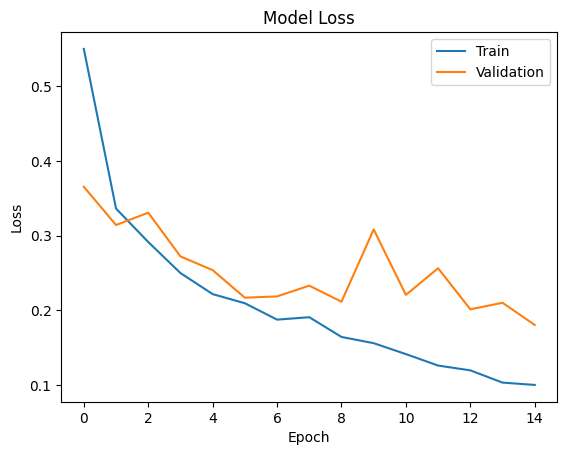

In [171]:
# plot training and validation loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

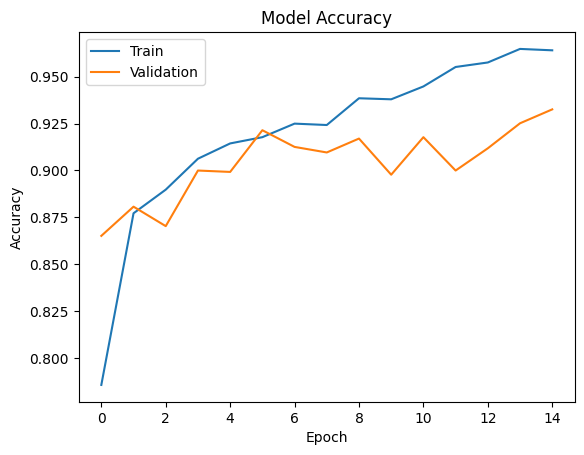

In [172]:
# plot training and validation accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [265]:
loss, accuracy = MNetv3.evaluate(test_images, test_labels)

53/53 [==============================] - 1s 15ms/step - loss: 0.1891 - accuracy: 0.9318


In [266]:
print('Accuracy:', accuracy)

Accuracy: 0.9318316578865051


In [173]:
y_pred = MNetv3.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

53/53 [==============================] - 1s 15ms/step


Text(0.5, 1.0, 'Confusion Matrix')

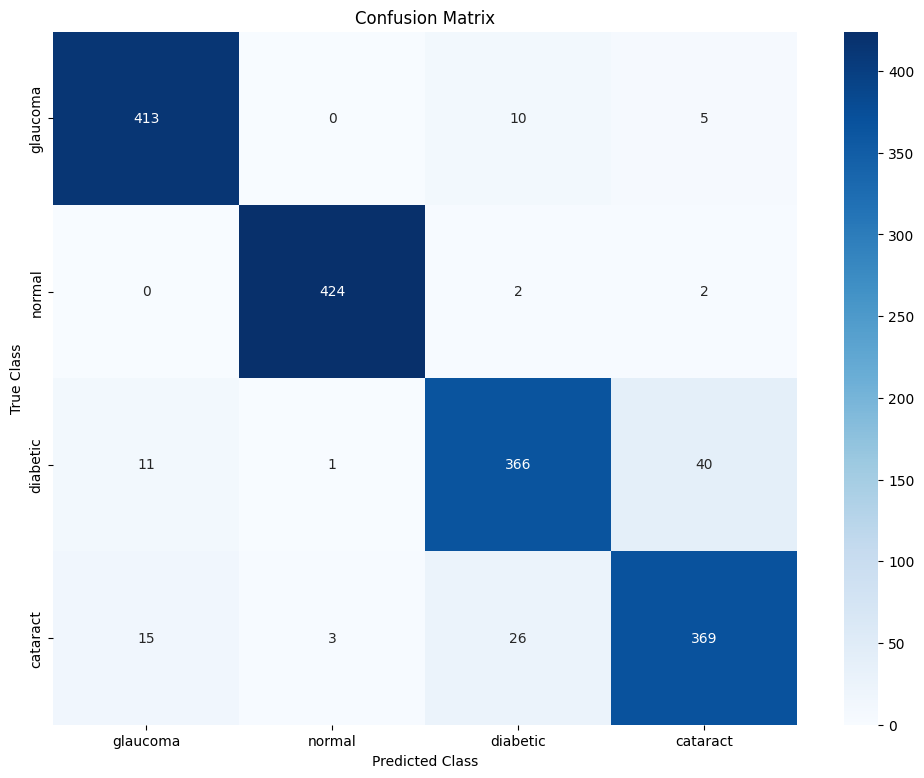

In [174]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=Labels, yticklabels=Labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

In [175]:
from sklearn.metrics import classification_report

y_pred = MNetv3.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_labels

report = classification_report(y_true_classes, y_pred_classes)
print(report)

53/53 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       428
           1       0.99      0.99      0.99       428
           2       0.91      0.88      0.89       418
           3       0.89      0.89      0.89       413

    accuracy                           0.93      1687
   macro avg       0.93      0.93      0.93      1687
weighted avg       0.93      0.93      0.93      1687



In [176]:
# Count the number of parameters in the model
num_params = MNetv3.count_params()

print("Total number of parameters in the model: ", num_params)

Total number of parameters in the model:  1013492


In [177]:
def get_model_size(model):
    variables = model.variables
    size = sum([np.product(list(variable.shape)) * variable.dtype.size for variable in variables])
    return size


model_size = get_model_size(MNetv3)
print(f"Model size: {model_size} bytes")

Model size: 4053968 bytes


In [178]:
# Calculate recall for each class
recall_per_class = recall_score(y_true_classes, y_pred_classes, average=None)
# Calculate recall for each class
recall_per_class = recall_score(y_true_classes, y_pred_classes, average=None)
# Calculate average recall across all classes
avg_recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
# Print recall scores
print('Recall per class:', recall_per_class)
print('Average recall:', avg_recall)

Recall per class: [0.96495327 0.99065421 0.87559809 0.89346247]
Average recall: 0.9318316538233551


In [179]:
# Count the number of parameters in the model
num_params = model.count_params()

print("Total number of parameters in the model: ", num_params)

Total number of parameters in the model:  1013363


In [180]:
#Save model to drive
MNetv3.save("MNetv3_Pretrained.h5")

In [200]:
def get_model_size(model):
    variables = model.variables
    size = sum([np.product(list(variable.shape)) * variable.dtype.size for variable in variables])
    return size


model_size = get_model_size(MNetv)
print(f"Model size: {model_size} bytes")

Model size: 4053968 bytes


In [181]:
start_time = time.time()
predictions = MNetv3.predict(test_images)
end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time

print("Inference time:", inference_time, "seconds")

53/53 [==============================] - 1s 13ms/step
Inference time: 1.595102071762085 seconds


In [182]:
MNetv3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d_5   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_15 (Dense)            (None, 128)               73856     
                                                                 
 dense_16 (Dense)            (None, 4)                 516       
                                                                 
Total params: 1,013,492
Trainable params: 74,372
Non-trainable params: 939,120
_________________________________________________________________


# Model Utilizing MobileNetV3 architecture without Pretrained data.

**<font color="red">Model Utilizing MobileNetV3 architecture without Pretrained data</font>**

In [183]:
# Define the model architecture
MNetv4 = tf.keras.Sequential([
    # First layer
    tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    
    # Depthwise separable convolution layers
    tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(48, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(96, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(160, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(160, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(320, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    # Final layers
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1280, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [184]:
MNetv4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [185]:
history4 = MNetv4.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
169/169 [==============================] - 12s 67ms/step - loss: 0.7876 - accuracy: 0.6764 - val_loss: 4.3144 - val_accuracy: 0.2513
Epoch 2/15
169/169 [==============================] - 11s 66ms/step - loss: 0.5125 - accuracy: 0.7932 - val_loss: 13.0547 - val_accuracy: 0.2513
Epoch 3/15
169/169 [==============================] - 11s 65ms/step - loss: 0.4526 - accuracy: 0.8173 - val_loss: 8.6599 - val_accuracy: 0.2698
Epoch 4/15
169/169 [==============================] - 11s 64ms/step - loss: 0.4079 - accuracy: 0.8371 - val_loss: 1.0799 - val_accuracy: 0.6553
Epoch 5/15
169/169 [==============================] - 11s 64ms/step - loss: 0.3860 - accuracy: 0.8417 - val_loss: 0.4341 - val_accuracy: 0.8317
Epoch 6/15
169/169 [==============================] - 11s 65ms/step - loss: 0.3597 - accuracy: 0.8562 - val_loss: 0.6004 - val_accuracy: 0.7828
Epoch 7/15
169/169 [==============================] - 11s 65ms/step - loss: 0.3413 - accuracy: 0.8603 - val_loss: 0.5116 - val_accuracy

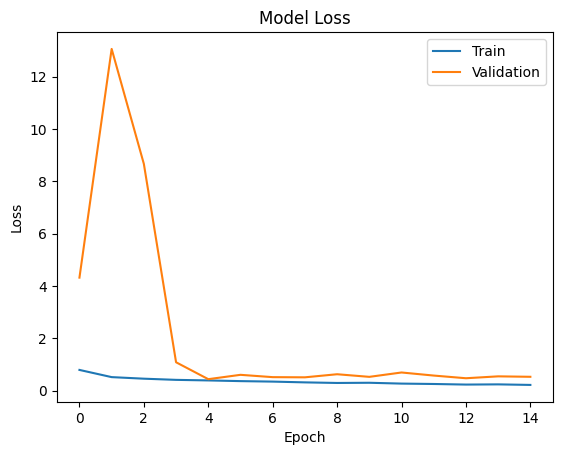

In [186]:
# plot training and validation loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

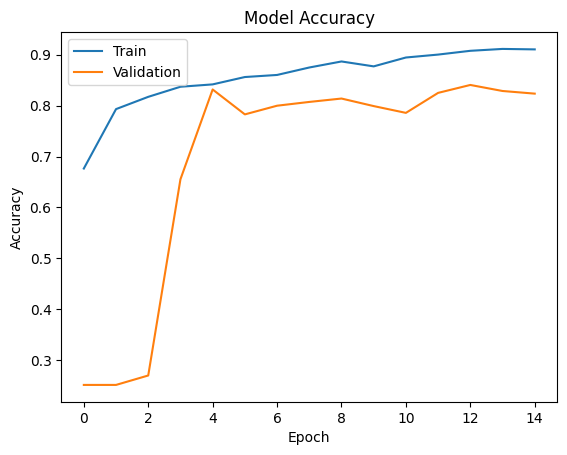

In [187]:
# plot training and validation accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [268]:
loss, accuracy = MNetv4.evaluate(test_images, test_labels)

53/53 [==============================] - 0s 9ms/step - loss: 0.5277 - accuracy: 0.8234


In [269]:
print('Accuracy:', accuracy)

Accuracy: 0.8233550786972046


In [189]:
from sklearn.metrics import classification_report

y_pred = MNetv4.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_labels

report = classification_report(y_true_classes, y_pred_classes)
print(report)

53/53 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       428
           1       0.92      1.00      0.96       428
           2       0.87      0.49      0.62       418
           3       0.80      0.85      0.82       413

    accuracy                           0.82      1687
   macro avg       0.83      0.82      0.81      1687
weighted avg       0.83      0.82      0.81      1687



In [191]:
y_pred = MNetv4.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

53/53 [==============================] - 0s 8ms/step


Text(0.5, 1.0, 'Confusion Matrix')

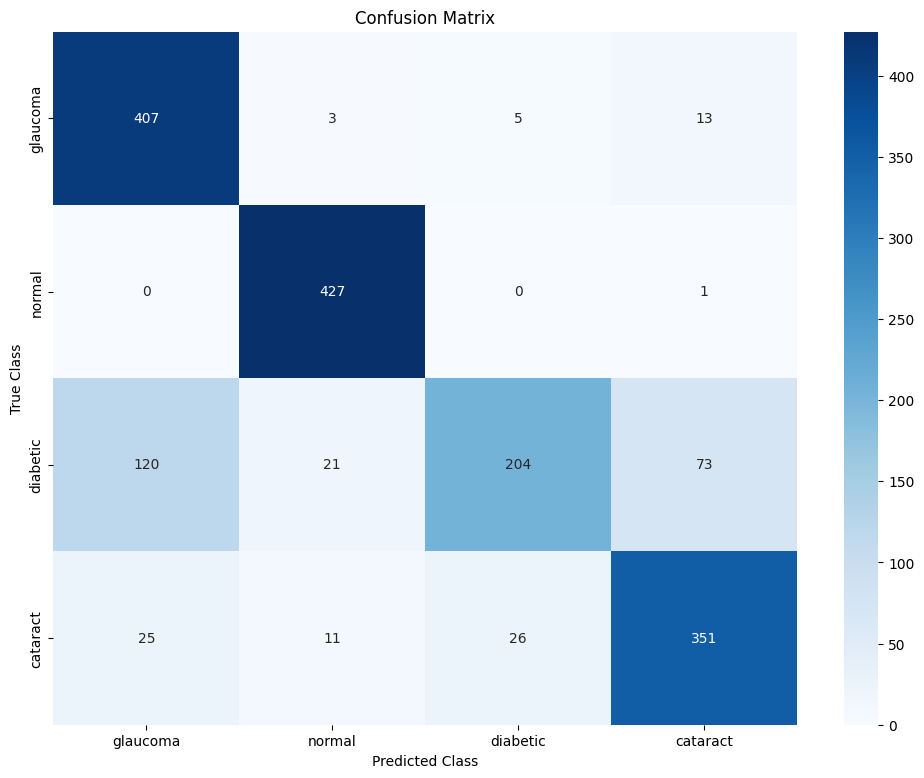

In [192]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=Labels, yticklabels=Labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

In [193]:
# Calculate precision for each class
y_true_classes = test_labels
precision_per_class = precision_score(y_true_classes, y_pred_classes, average=None)

# Calculate average precision across all classes
avg_precision = precision_score(y_true_classes, y_pred_classes, average='weighted')

# Print precision scores
print('Precision per class:', precision_per_class)
print('Average precision:', avg_precision)

Precision per class: [0.73731884 0.92424242 0.86808511 0.80136986]
Average precision: 0.8328236806381839


In [194]:
# Calculate recall for each class
recall_per_class = recall_score(y_true_classes, y_pred_classes, average=None)
# Calculate recall for each class
recall_per_class = recall_score(y_true_classes, y_pred_classes, average=None)
# Calculate average recall across all classes
avg_recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
# Print recall scores
print('Recall per class:', recall_per_class)
print('Average recall:', avg_recall)

Recall per class: [0.95093458 0.99766355 0.48803828 0.84987893]
Average recall: 0.8233550681683461


In [196]:
# Count the number of parameters in the model
num_params = MNetv4.count_params()

print("Total number of parameters in the model: ", num_params)

Total number of parameters in the model:  534580


In [197]:
def get_model_size(model):
    variables = model.variables
    size = sum([np.product(list(variable.shape)) * variable.dtype.size for variable in variables])
    return size


model_size = get_model_size(MNetv4)
print(f"Model size: {model_size} bytes")

Model size: 2138320 bytes


In [198]:
start_time = time.time()
predictions = MNetv4.predict(test_images)
end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time

print("Inference time:", inference_time, "seconds")

53/53 [==============================] - 1s 11ms/step
Inference time: 1.491058111190796 seconds


In [199]:
#Save model to drive
MNetv4.save("MNetv3.h5")

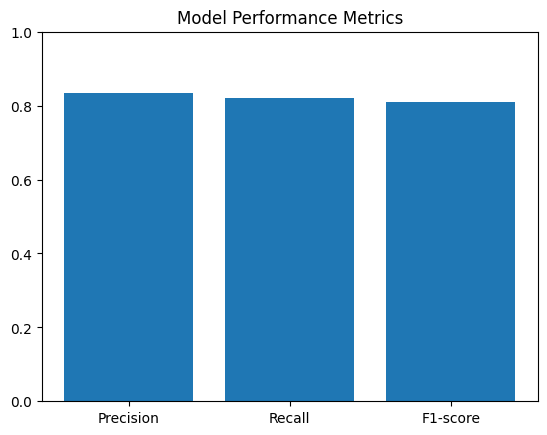

In [201]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_true=test_labels
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred_labels, average='macro')

# Plot the metrics as a bar chart
fig, ax = plt.subplots()
ax.bar(['Precision', 'Recall', 'F1-score'], [precision, recall, f1_score])
ax.set_ylim([0, 1])
ax.set_title('Model Performance Metrics')
plt.show()

# Model Utilizing ResNet CNN architecture 

In [218]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, Flatten, Dense
from tensorflow.keras.models import Model, Sequential

In [227]:
# Split the data into train-validation-test sets
train_images, test_images, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [238]:
def residual_block(x, filters, downsample=False):
    strides = (2, 2) if downsample else (1, 1)
    y = Conv2D(filters=filters, kernel_size=(3, 3), strides=strides, padding="same")(x)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)
    y = Conv2D(filters=filters, kernel_size=(3, 3), padding="same")(y)
    y = BatchNormalization()(y)
    if downsample:
        x = Conv2D(filters=filters, kernel_size=(1, 1), strides=strides, padding="same")(x)
    out = Add()([x, y])
    out = Activation("relu")(out)
    return out

In [239]:
def resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2), padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same")(x)
    
    x = residual_block(x, filters=64, downsample=False)
    x = residual_block(x, filters=64, downsample=False)
    x = residual_block(x, filters=64, downsample=False)
    
    x = residual_block(x, filters=128, downsample=True)
    x = residual_block(x, filters=128, downsample=False)
    x = residual_block(x, filters=128, downsample=False)
    
    x = residual_block(x, filters=256, downsample=True)
    x = residual_block(x, filters=256, downsample=False)
    x = residual_block(x, filters=256, downsample=False)
    
    x = residual_block(x, filters=512, downsample=True)
    x = residual_block(x, filters=512, downsample=False)
    x = residual_block(x, filters=512, downsample=False)
    
    x = Flatten()(x)
    x = Dense(units=num_classes, activation="softmax")(x)
    
    ResNet = Model(inputs, x)
    return ResNet

In [240]:
input_shape = (224, 224, 3)
num_classes = 4

In [241]:
ResNet = resnet(input_shape, num_classes)

In [242]:
ResNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [246]:
#Train the model
history5 = ResNet.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
169/169 [==============================] - 9s 54ms/step - loss: 0.2807 - accuracy: 0.8933 - val_loss: 0.4328 - val_accuracy: 0.8377
Epoch 2/15
169/169 [==============================] - 9s 52ms/step - loss: 0.2501 - accuracy: 0.9020 - val_loss: 0.4913 - val_accuracy: 0.8199
Epoch 3/15
169/169 [==============================] - 9s 52ms/step - loss: 0.2415 - accuracy: 0.9101 - val_loss: 0.4290 - val_accuracy: 0.8466
Epoch 4/15
169/169 [==============================] - 9s 52ms/step - loss: 0.2149 - accuracy: 0.9199 - val_loss: 0.4041 - val_accuracy: 0.8510
Epoch 5/15
169/169 [==============================] - 9s 52ms/step - loss: 0.1917 - accuracy: 0.9272 - val_loss: 0.4458 - val_accuracy: 0.8473
Epoch 6/15
169/169 [==============================] - 9s 52ms/step - loss: 0.1824 - accuracy: 0.9318 - val_loss: 0.4233 - val_accuracy: 0.8525
Epoch 7/15
169/169 [==============================] - 9s 52ms/step - loss: 0.2609 - accuracy: 0.9099 - val_loss: 0.5464 - val_accuracy: 0.8340

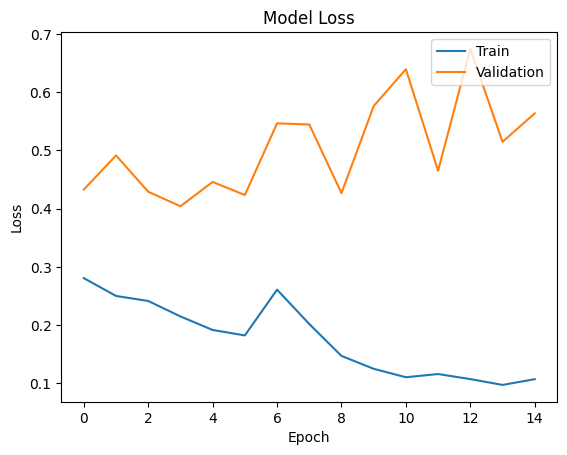

In [247]:
# plot training and validation loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

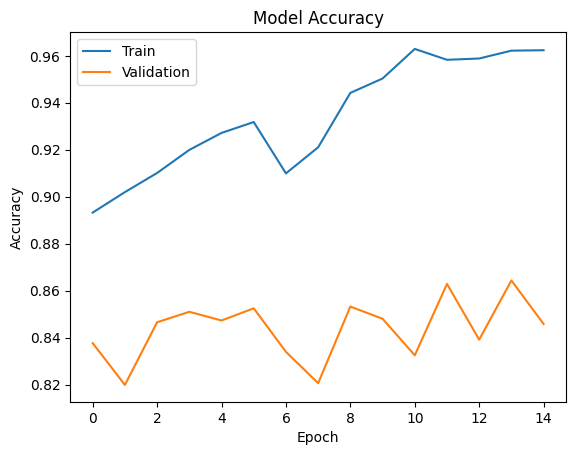

In [248]:
# plot training and validation accuracy
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [249]:
y_pred = ResNet.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

53/53 [==============================] - 1s 20ms/step


Text(0.5, 1.0, 'Confusion Matrix')

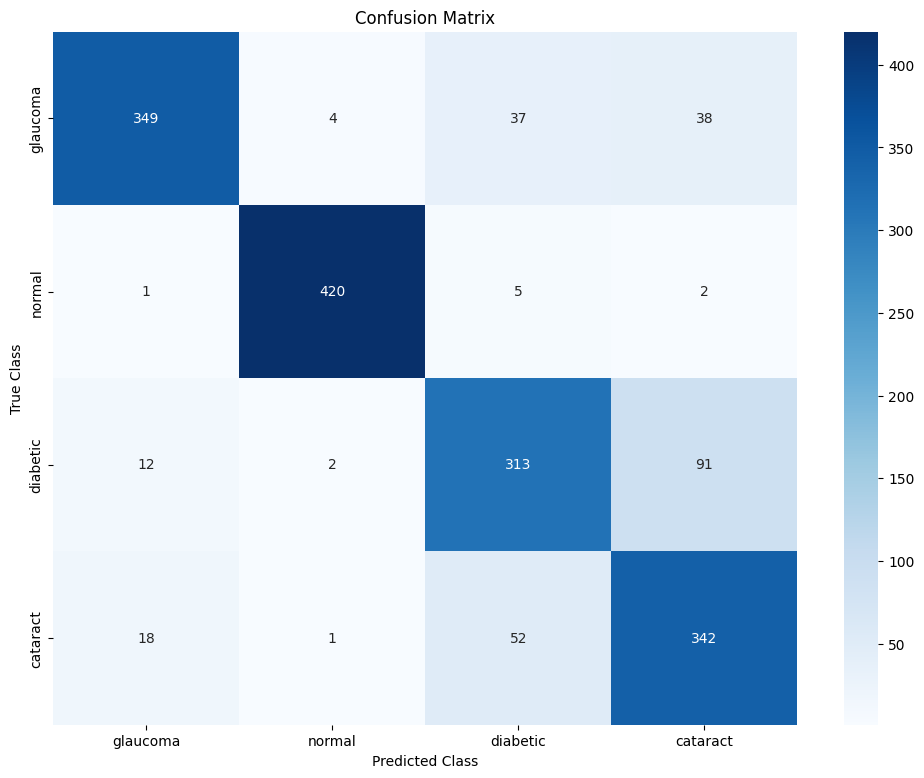

In [250]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=Labels, yticklabels=Labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

In [251]:
loss, accuracy = VGG_Model.evaluate(test_images, test_labels)

53/53 [==============================] - 2s 42ms/step - loss: 0.4302 - accuracy: 0.8287


In [252]:
print('Accuracy:', accuracy, 'Loss:', loss)

Accuracy: 0.8286899924278259 Loss: 0.4301982522010803


In [253]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_true=test_labels
report = classification_report(y_true, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.82      0.86       428
           1       0.98      0.98      0.98       428
           2       0.77      0.75      0.76       418
           3       0.72      0.83      0.77       413

    accuracy                           0.84      1687
   macro avg       0.85      0.84      0.84      1687
weighted avg       0.85      0.84      0.85      1687



In [254]:
# Calculate precision for each class
y_true_classes = test_labels
precision_per_class = precision_score(y_true_classes, y_pred_classes, average=None)

# Calculate average precision across all classes
avg_precision = precision_score(y_true_classes, y_pred_classes, average='weighted')

# Print precision scores
print('Precision per class:', precision_per_class)
print('Average precision:', avg_precision)

Precision per class: [0.91842105 0.98360656 0.76904177 0.7230444 ]
Average precision: 0.8501153602225086


In [255]:
# Calculate recall for each class
recall_per_class = recall_score(y_true_classes, y_pred_classes, average=None)
# Calculate recall for each class
recall_per_class = recall_score(y_true_classes, y_pred_classes, average=None)
# Calculate average recall across all classes
avg_recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
# Print recall scores
print('Recall per class:', recall_per_class)
print('Average recall:', avg_recall)

Recall per class: [0.81542056 0.98130841 0.74880383 0.82808717]
Average recall: 0.8441019561351512


In [256]:
# Count the number of parameters in the model
num_params = ResNet.count_params()

print("Total number of parameters in the model: ", num_params)

Total number of parameters in the model:  17564164


In [257]:
def get_model_size(model):
    variables = model.variables
    size = sum([np.product(list(variable.shape)) * variable.dtype.size for variable in variables])
    return size


model_size = get_model_size(ResNet)
print(f"Model size: {model_size} bytes")

Model size: 70256656 bytes


In [258]:
start_time = time.time()
predictions = ResNet.predict(test_images)
end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time

print("Inference time:", inference_time, "seconds")

53/53 [==============================] - 1s 18ms/step
Inference time: 2.0376698970794678 seconds


In [259]:
#Save model to drive
ResNet.save("ResNet.h5")

In [260]:
CNNmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 173056)           

# SUMMARY

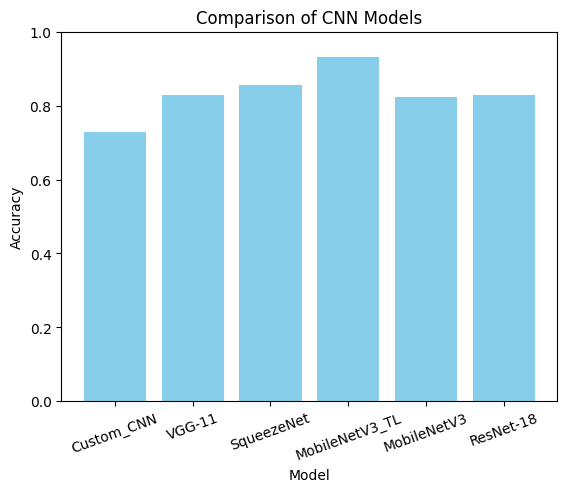

In [327]:
models = ['Custom_CNN', 'VGG-11', 'SqueezeNet', 'MobileNetV3_TL', 'MobileNetV3', 'ResNet-18', ]
accuracy = [0.7285, 0.82868, 0.8566,0.93183,0.82335,0.82869]
f1_score=[0.85,0.83,0.85,0.93,0.81,0.85]
#colors = np.array(['red', 'green', 'blue', 'orange', 'purple'])
colors = 'violet'
# Plot the accuracies on a bar chart
plt.bar(models, accuracies, color="skyblue")
plt.ylim([0, 1])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of CNN Models')
plt.xticks(rotation=20)
plt.show()

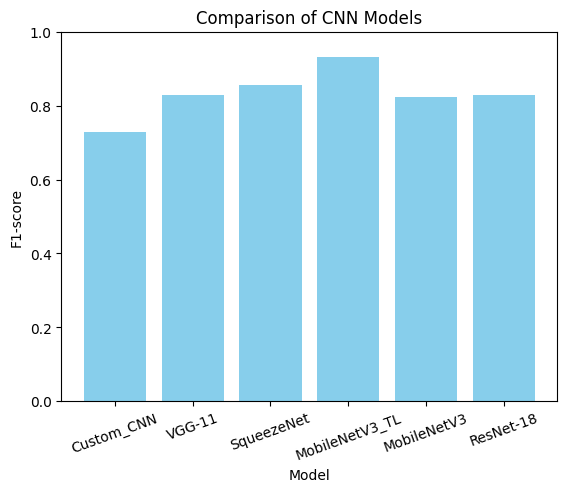

In [326]:
plt.bar(models, accuracies, color="skyblue")
plt.ylim([0, 1])
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.title('Comparison of CNN Models')
plt.xticks(rotation=20)
plt.show()

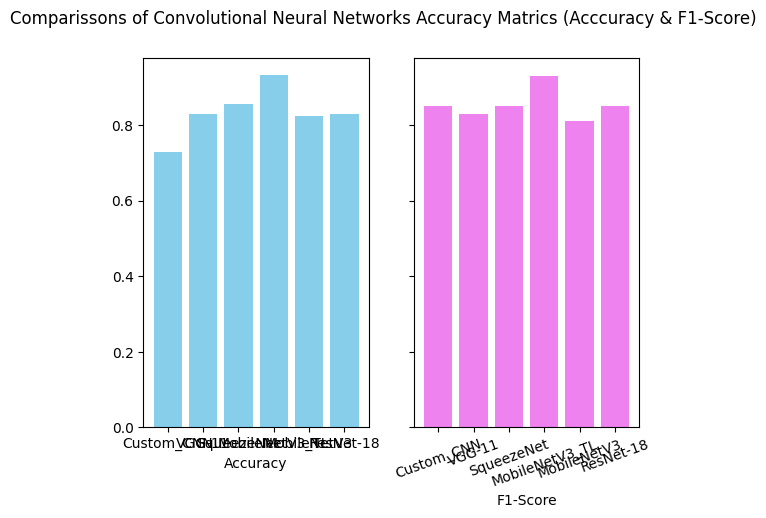

In [323]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plt.xticks(rotation=20)
# Plot the first bar plot
ax1.bar(models, accuracies, color='skyblue')
ax1.set_xlabel('Accuracy')
#ax1.set_ylabel('Y-axis label')

# Plot the second bar plot
ax2.bar(models, f1_score, color='violet')
ax2.set_xlabel('F1-Score')
#ax2.set_ylabel('Y-axis label')

# Add a title to the figure
fig.suptitle('Comparissons of Convolutional Neural Networks Accuracy Matrics (Acccuracy & F1-Score)')
plt.xticks(rotation=20)
# Show the plot
plt.show()

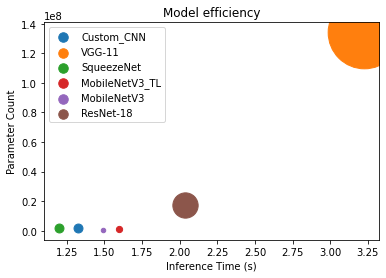

In [47]:
import matplotlib.pyplot as plt

# Data
model_names = ['Custom_CNN', 'VGG-11', 'SqueezeNet', 'MobileNetV3_TL', 'MobileNetV3', 'ResNet-18']
inference_times = [1.327, 3.2224, 1.2012, 1.5951, 1.491058, 2.0376698]
model_memories = [8.0, 528.0, 8.0, 3.9, 2.0, 64.0]
parameter_counts = [2092072, 134276932, 2092072, 1013363, 534580, 17564164]

# Plot
fig, ax = plt.subplots()
for i in range(len(model_names)):
    ax.scatter(inference_times[i], parameter_counts[i], s=model_memories[i]*10, label=model_names[i])

# Legend
legend = ax.legend(loc='upper left')
for i in range(len(legend.legendHandles)):
    legend.legendHandles[i]._sizes = [90]

# Labels
ax.set_xlabel('Inference Time (s)')
ax.set_ylabel('Parameter Count')
ax.set_title('Model efficiency')

# Show plot
plt.show()


In [34]:
model_names = ['Custom_CNN', 'VGG-11', 'SqueezeNet', 'MobileNetV3_TL', 'MobileNetV3', 'ResNet-18']
inference_times = [1.327, 3.2224, 1.2012, 1.5951, 1.491058, 2.0376698]
model_memories = [8.0, 528.0, 8.0, 3.9, 2.0, 64.0]
parameter_counts = [2092072, 134276932, 2092072, 1013363, 534580, 17564164]
Model=Accuracy = [0.7285,0.8286,0.8566,0.93183,0.8233,0.828689]
Model_Loss = [0.7895,0.4302,0.3579 ,0.1891,0.5277,0.43019]
Model Precision = [0.73 ,0.84,0.85,0.93,0.83,0.8501]
Model F1-Score = [0.73 ,0.83,0.85,0.93,0.81,0.85]
Model_Recall_Score = [0.73 ,0.83,0.85,0.93,0.82,0.84]

In [40]:
# Define the data
inference_times = [1.327, 3.2224, 1.2012, 1.5951, 1.491058, 2.0376698]
model_memories = [8.0, 528.0, 8.0, 3.9, 2.0, 64.0]
parameter_counts = [2092072, 134276932, 2092072, 1013363, 534580, 17564164]
model_names = ['Custom_CNN', 'VGG-11', 'SqueezeNet', 'Model 4', 'MobileNetV3_TL', 'MobileNetV3']
model_accuracy = [0.7285,0.8286,0.8566,0.93183,0.8233,0.828689]
model_loss = [0.7895,0.4302,0.3579 ,0.1891,0.5277,0.43019]
model_precision = [0.73 ,0.84,0.85,0.93,0.83,0.8501]
model_f1_score = [0.73 ,0.83,0.85,0.93,0.81,0.85]
model_recall_score = [0.73 ,0.83,0.85,0.93,0.82,0.84]

# Create a dictionary to hold the data
data = {
    'Model Name': model_names,
    'Inference Time (seconds)': inference_times,
    'Model Memory (MB)': model_memories,
    'Parameter Count': parameter_counts,
    'Accuracy': model_accuracy,
    'Loss': model_loss,
    'Precision score': model_precision,
    'F1-Score': model_f1_score,
    'Recall score': model_recall_score
}

# Create a pandas DataFrame from the data
df = pd.DataFrame(data)

# Set the index of the DataFrame to be the Model Name column
df.set_index('Model Name', inplace=True)

# Display the DataFrame as a table in Jupyter Notebook
df

,Inference Time (seconds),Model Memory (MB),Parameter Count,Accuracy,Loss,Precision score,F1-Score,Recall score
Model Name,,,,,,,,
Custom_CNN,1.327000,8.0,2092072,0.728500,0.78950,0.7300,0.73,0.73
VGG-11,3.222400,528.0,134276932,0.828600,0.43020,0.8400,0.83,0.83
SqueezeNet,1.201200,8.0,2092072,0.856600,0.35790,0.8500,0.85,0.85
Model 4,1.595100,3.9,1013363,0.931830,0.18910,0.9300,0.93,0.93
MobileNetV3_TL,1.491058,2.0,534580,0.823300,0.52770,0.8300,0.81,0.82
MobileNetV3,2.037670,64.0,17564164,0.828689,0.43019,0.8501,0.85,0.84
